# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | antofagasta
Processing Record 8 of Set 1 | salalah
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | heiligenhafen
Processing Record 13 of Set 1 | polson
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | rudbar
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | san cristob

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# # Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,barrow,71.2906,-156.7887,-19.99,77,20,5.14,US,1681355123
1,arraial do cabo,-22.9661,-42.0278,23.99,87,96,7.81,BR,1681355123
2,bluff,-46.6000,168.3333,11.56,78,86,9.39,NZ,1681355094
3,punta arenas,-53.1500,-70.9167,2.84,75,0,3.09,CL,1681355088
4,saint-philippe,-21.3585,55.7679,24.77,82,15,0.83,RE,1681355124


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-19.99,77,20,5.14,US,1681355123
1,arraial do cabo,-22.9661,-42.0278,23.99,87,96,7.81,BR,1681355123
2,bluff,-46.6000,168.3333,11.56,78,86,9.39,NZ,1681355094
3,punta arenas,-53.1500,-70.9167,2.84,75,0,3.09,CL,1681355088
4,saint-philippe,-21.3585,55.7679,24.77,82,15,0.83,RE,1681355124


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

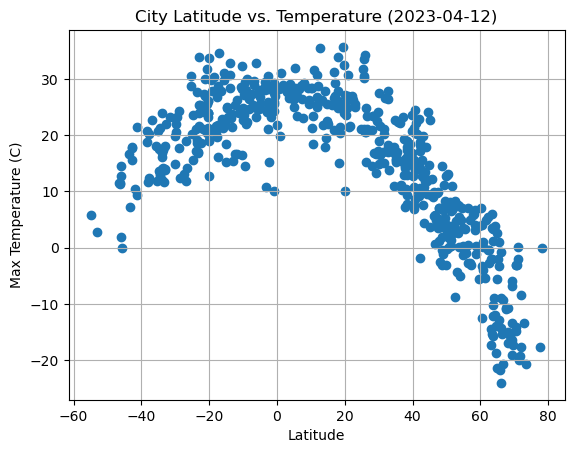

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2023-04-12)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

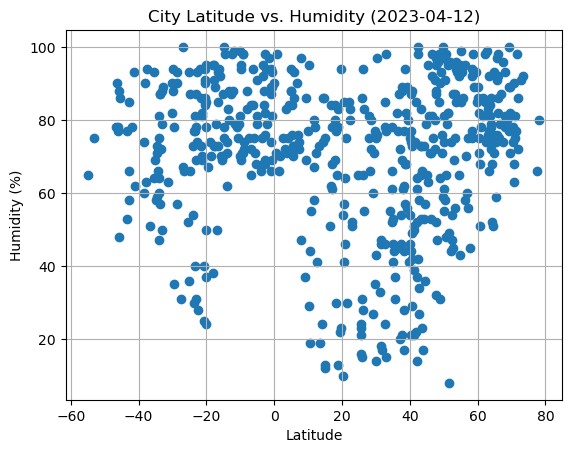

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-04-12)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

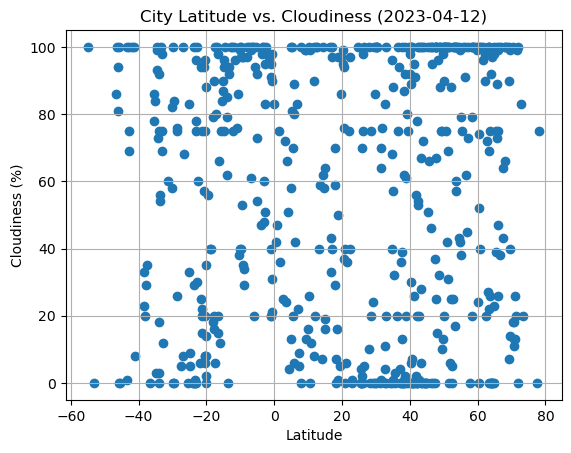

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-04-12)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

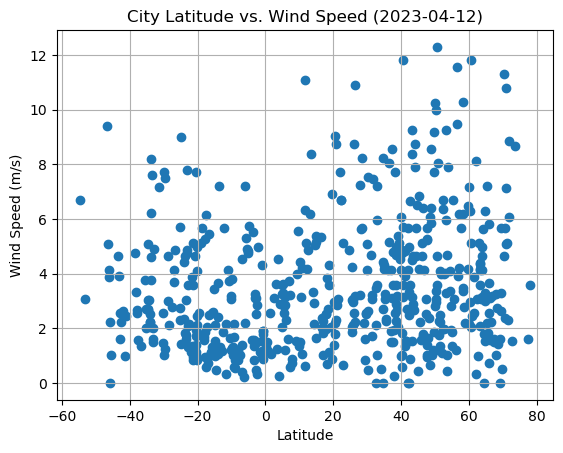

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-04-12)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x,y,x_label,y_label):
    ## Convert to floats and store Poverty Rate and Bank Count as x and y values
    x_values = x.astype("float")
    y_values = y.astype("float")

    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values,y_values)

    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),fontsize=15,color="red",annotation_clip= False)

    # Label plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,barrow,71.2906,-156.7887,-19.99,77,20,5.14,US,1681355123
7,salalah,17.0151,54.0924,27.05,78,40,1.03,OM,1681354559
8,hilo,19.7297,-155.0900,24.04,94,97,0.89,US,1681354981
9,jamestown,42.0970,-79.2353,18.80,52,0,4.12,US,1681354833
10,heiligenhafen,54.3667,10.9833,4.86,92,43,4.09,DE,1681355126


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arraial do cabo,-22.9661,-42.0278,23.99,87,96,7.81,BR,1681355123
2,bluff,-46.6000,168.3333,11.56,78,86,9.39,NZ,1681355094
3,punta arenas,-53.1500,-70.9167,2.84,75,0,3.09,CL,1681355088
4,saint-philippe,-21.3585,55.7679,24.77,82,15,0.83,RE,1681355124
5,rikitea,-23.1203,-134.9692,25.38,69,78,4.75,PF,1681355124


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7887548199774099


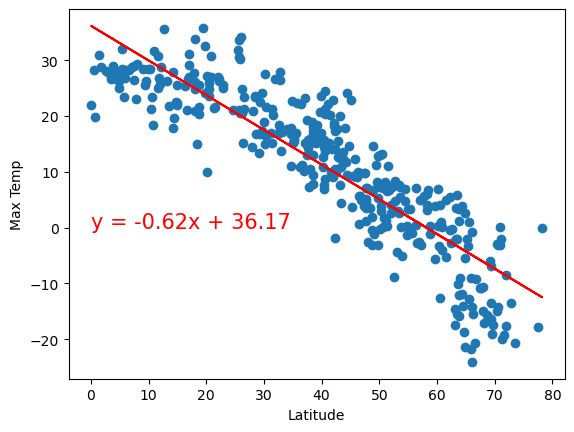

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Latitude","Max Temp")

R squared: 0.4111938520165789


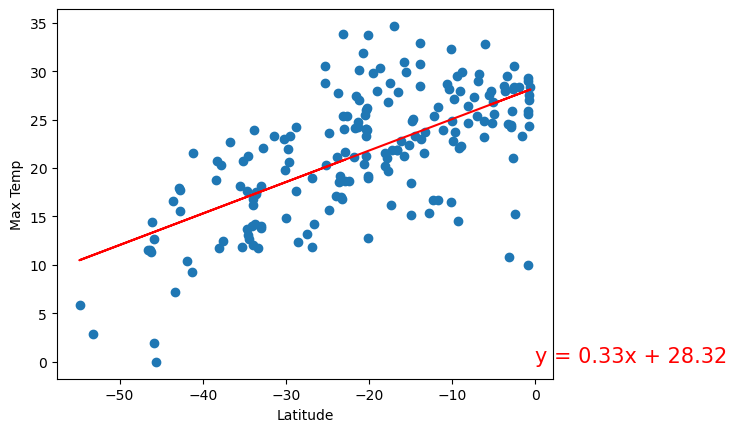

In [16]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude","Max Temp")

**Discussion about the linear relationship:** The R squared value is higher for northern hemisphere compared to southern hemisphere which means the northern hemishphere data better fits the model. Also, the southern hemispher latitude values are negative, so the temperature value increases as the (negative) latitude value gets smaller, which means tempaerature decreases as we go farther from the equator.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.05904979272457768


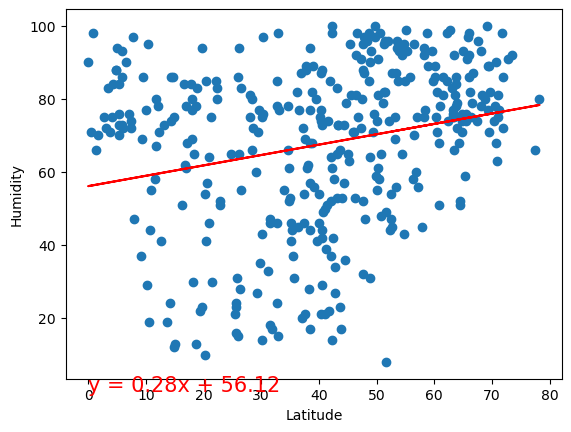

In [17]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Latitude","Humidity")

R squared: 0.050285575995830764


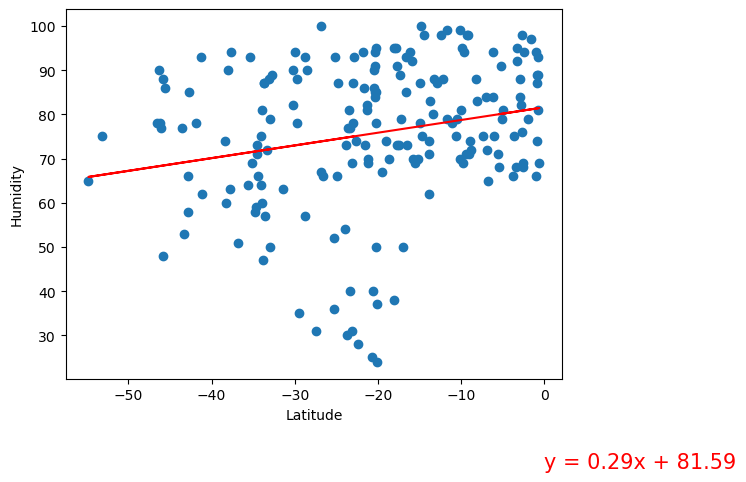

In [18]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude","Humidity")

**Discussion about the linear relationship:** The R squared value is higher for northern hemisphere compared to southern hemisphere which means the northern hemishphere data better fits the model. Also, the humidity values are the highest when the (positive) latitude values are the largest, which means humidity decreases as we go farther from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.012729087678531


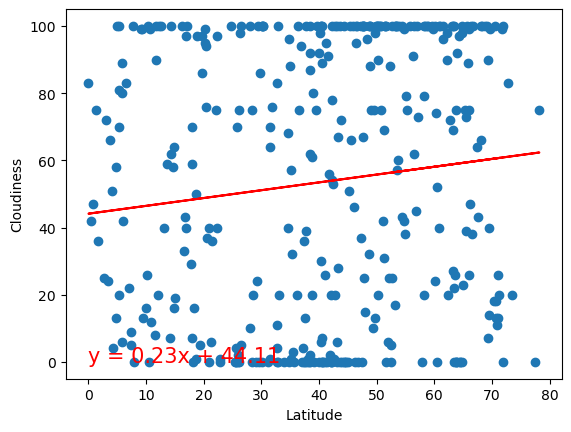

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Latitude","Cloudiness")

R squared: 0.03628650643344372


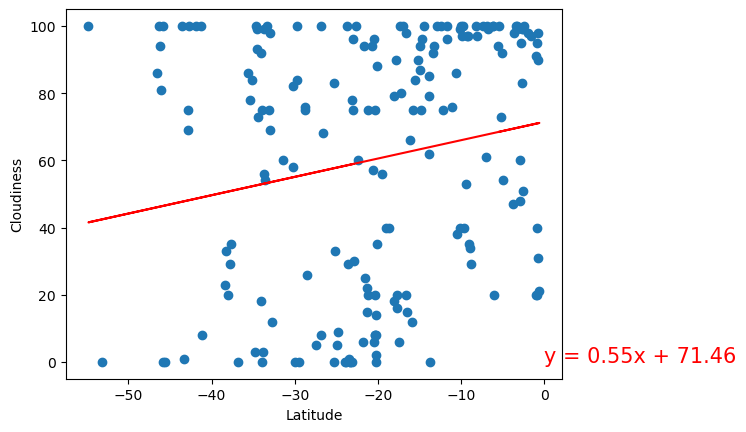

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude","Cloudiness")

**Discussion about the linear relationship:** The R squared value is higher for northern hemisphere compared to southern hemisphere which means the northern hemishphere data better fits the model. Also, the cloudiness values are the highest when the (positive) latitude values are the largest, which means cloudiness decreases as we go farther from the equator.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.015330932271225525


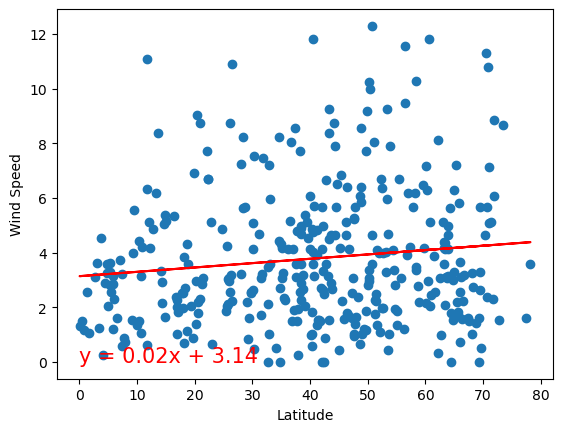

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Latitude","Wind Speed")

R squared: 0.05448933145770907


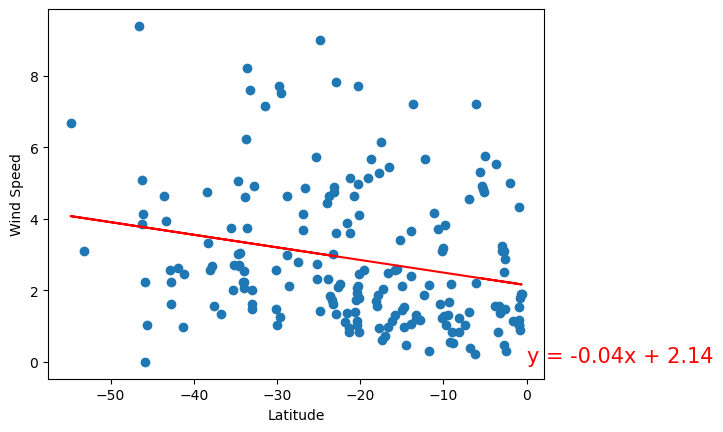

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude","Wind Speed")

**Discussion about the linear relationship:** The R squared value is higher for southern hemisphere compared to northern hemisphere which means the southern hemishphere data better fits the model. Also, the wind speed values are the highest when the (negative) latitude values are the largest, which means wind speed decreases as we go closer to the equator.